## Table of Contents
<ul>
<li><a href="#intro">Gathering</a></li>
<li><a href="#wrangling">Assessing</a></li>
<li><a href="#eda">Cleaning</a></li>
<li><a href="#conclusions">Analyzing</a></li>
</ul>

In [2]:
import pandas as pd;
import numpy as np;

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

import requests as req
import tweepy as tp
import json as js
import os

<a id='intro'></a>
## Gathering


### Reading the twitter archive

In [3]:
## download and read the csv file manually.
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
twitter_archive.head(1) ## making sure I read the file correctly.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Reading the Image Prediction file

In [5]:
## Going to read the tsv file through a url, using the request libraby.
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = req.get(link) 

fName = "image-prediction.tsv" ## our file name
with open(os.path.join(fName),mode='wb') as file:
    file.write(response.content) ## Writing into the file we created.
    
    
    
image_df = pd.read_csv(fName,sep='\t'); ## seperated through taps, instead of commas by default.


In [6]:
image_df.head(1) ## making sure it was read correctly.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Reading the Twitter json file

In [7]:

## I was not able to get access to twitter API.
## I will use the file given: tweet-json.txt


"""
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) """

'\nimport tweepy\nfrom tweepy import OAuthHandler\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tweet_id.valu

In [8]:
##Reading using pd.read_json. Setting lines=True so that the file read is read
##Line by line as a json file.
##Doucmentation: lines : bool, default False,Read the file as a json object per line.


json_df = pd.read_json('tweet-json.txt',lines=True);

In [9]:
json_df.head(1)  ## checking if read correctly.

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
json_df = json_df[["retweet_count","favorite_count","id"]] ## Only desired columns
json_df.head(1) 

,retweet_count,favorite_count,id
0,8853,39467,892420643555336193


<a id='wrangling'></a>
## Assessing

### Twitter_Archive

In [11]:
twitter_archive ## Visual Assement

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
twitter_archive.info() ## Programatic Assessment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_archive[twitter_archive.expanded_urls.isnull()].head(5) ## To observe missing url rows 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [14]:
twitter_archive.duplicated().sum()

0

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
twitter_archive.rating_numerator.value_counts().sort_index() 

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [17]:
## Checking for numerator outliers.( >17)
pd.options.display.max_colwidth = 200 ## To show the whole text.
twitter_archive[twitter_archive.rating_numerator > 17].text

188                                                                                        @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189                                         @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
290                                                                                                                                                            @markhoppus 182/10
313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340                                  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
433                                                                           The floofs have been released I 

In [18]:
twitter_archive.rating_denominator.value_counts().sort_index() 

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [19]:
twitter_archive.tweet_id.duplicated().sum()

0

### Image Prediction

In [20]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

### Twitter JSON


In [23]:
json_df.head()

,retweet_count,favorite_count,id
0,8853,39467,892420643555336193
1,6514,33819,892177421306343426
2,4328,25461,891815181378084864
3,8964,42908,891689557279858688
4,9774,41048,891327558926688256


In [24]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
id                2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Observed Issues:   



### Quality:

#### "X" = Finished

1-"timestamp" column should be of type datetime. <b> <u> X </u> </b>

2-There are some clear outliers in the rating_numerator column. <b> <u> X </u> </b>

3-The denominators are not all consistent.(expected 10 for all). <b> <u> X </u> </b>

4-The predicted values are not standarlized (Some are captial other are small letters). <b> <u> X </u> </b>

5-All tweet ids are of integer type and not Object type(We don't need arthimetic operations on ids).<b> <u> X </u> </b>

6-Some tweets are retweets.<b> <u> X </u> </b>

7-Some expanding urls are missing.<b> <u> X </u> </b>

8-retweeted_status_id and retweeted_status_user_id are of type float. <b> <u> X </u> </b>     

### Tidiness:

#### "X" = Finisihed


1- Column names on the image predication are not easily understandble. 
<b> <u> X </u> </b>

2- The three dataframes all describe the same thing (A unique tweet). They should be merged togther to make analysis easier. <b> <u> X </u> </b>


3-What we call a "Dog Stage" is described over 4 different columns(doggo, floofer, pupper, puppo). <b> <u> X </u> </b>






<a id='eda'></a>
## Cleaning:



## Tidiness



### Merge the dataframes



#### Definition: Merging Three different dataframes on a common column that represents the tweet id.



I will merge the 3 dataframes based on tweet_id (primary key) first. In order to efficently clean the reset of the data in one dataframe.

I will make copies of the dataframes to preserve the orignal data. 

In [25]:
twitter_archive_copy = twitter_archive.copy()
image_df_copy = image_df.copy()
json_df_copy = json_df.copy()

In [26]:
master_df = twitter_archive_copy ## first create a new master dataframe.
master_df.head(1).T

,0
tweet_id,892420643555336193
in_reply_to_status_id,NaN
in_reply_to_user_id,NaN
timestamp,2017-08-01 16:23:56 +0000
source,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
text,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
retweeted_status_id,NaN
retweeted_status_user_id,NaN
retweeted_status_timestamp,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643555336193/photo/1


In [27]:
master_df.shape

(2356, 17)

Before merging the twitter_archive and image_df. I don't want to merge every column. I will only merge the three relevent columns: (p1,p1_conf,p1_dog), as I don't need the reset.

In [28]:
image_df_copy.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [29]:
image_df_copy = image_df_copy[["tweet_id","p1","p1_conf","p1_dog"]];
image_df_copy.head(1)

,tweet_id,p1,p1_conf,p1_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True


In [30]:
image_df_copy.shape

(2075, 4)

In [31]:
master_df = master_df.merge(image_df_copy)
master_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_conf,p1_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,orange,0.097049,False


In [32]:
master_df.shape

(2075, 20)

In [33]:
## Now I will merge with the last dataframe, json_df

json_df.head(1)

,retweet_count,favorite_count,id
0,8853,39467,892420643555336193


In [34]:
json_df.shape

(2354, 3)

In [35]:
## Notice that the column to be merged on is named differently.

master_df = master_df.merge(json_df,left_on="tweet_id",right_on="id")

In [36]:
master_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,p1,p1_conf,p1_dog,retweet_count,favorite_count,id
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,None,None,None,None,orange,0.097049,False,8853,39467,892420643555336193


In [37]:
## need to drop id column.
master_df.drop(columns="id",inplace = True)


In [38]:
master_df.shape

(2073, 22)

### Renaming Column Names

#### Definition: Renaming the columns that were gathered from the image_predication data frame: (p1,p1_conf,p1_dog) to: (image_prediction, prediction_confidence, prediction_isdog)

In [39]:
master_df.rename(columns={'p1':'image_prediction',
                          'p1_conf':'prediction_confidence',
                          'p1_dog':'prediction_isdog'}, 
                 inplace=True)

In [40]:
master_df.head(1) ## asserting the change.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,image_prediction,prediction_confidence,prediction_isdog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,Phineas,None,None,None,None,orange,0.097049,False,8853,39467


### Creating new column dog_stage

#### Definition: The columns: doggo, floofer, pupper, puppo, should be represented in one new column dog_stage.

In [41]:
## create the column dog_stage 
master_df["dog_stage"] = ""
master_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,image_prediction,prediction_confidence,prediction_isdog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,None,None,None,None,orange,0.097049,False,8853,39467,


In [42]:
cols = ["doggo","floofer","pupper","puppo"]


for column in cols:
    print(master_df[column].value_counts())

None     1993
doggo      80
Name: doggo, dtype: int64
None       2065
floofer       8
Name: floofer, dtype: int64
None      1852
pupper     221
Name: pupper, dtype: int64
None     2049
puppo      24
Name: puppo, dtype: int64


In [43]:
##Before adding the values we need to change the None values to the empty
##character in order to add the 4 columns correctly correctly. 

cols = ["doggo","floofer","pupper","puppo"]
for column in cols:
    master_df[column].replace("None","",inplace = True)

In [44]:
## Asserting
for column in cols:
    print(master_df[column].value_counts()) 

         1993
doggo      80
Name: doggo, dtype: int64
           2065
floofer       8
Name: floofer, dtype: int64
          1852
pupper     221
Name: pupper, dtype: int64
         2049
puppo      24
Name: puppo, dtype: int64


Now we can merge into the new column dog_stage

In [45]:
for column in cols:
    master_df["dog_stage"] += master_df[column];

In [46]:
master_df.dog_stage.value_counts() ## some values are combined dog_stages.
                                ## I assume that 

                1753
pupper           210
doggo             67
puppo             23
doggopupper       11
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [47]:
# I assume that a dog can't have two stages so I will drop them.

master_df.drop(master_df[master_df["dog_stage"].map(len)>7].index,inplace=True)



In [48]:
master_df.dog_stage.value_counts() ## Change sucssessfuly apllied.

           1753
pupper      210
doggo        67
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [49]:
master_df.shape

(2060, 23)

In [50]:
master_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,image_prediction,prediction_confidence,prediction_isdog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,,,,,orange,0.097049,False,8853,39467,


master_df.drop(cols,axis=1,inplace=True) ##dropping the columns as they are no longer of use


In [51]:
master_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,image_prediction,prediction_confidence,prediction_isdog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,,,,,orange,0.097049,False,8853,39467,


In [52]:
master_df.shape ## Done

(2060, 23)

## Quality



### Assigning timestamp column to the correct datatype.


#### Definition: Change the type of timestap to datatime.

In [53]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      2060 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2060 non-null object
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
doggo                         2060 non-null object
floofer                       2060 non-null object
pupper                        2060 non-null object
puppo                         2060 non-null object
image_prediction              2060 

In [54]:
master_df["timestamp"] = pd.to_datetime(master_df.timestamp)

In [55]:
master_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,image_prediction,prediction_confidence,prediction_isdog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,,,,,orange,0.097049,False,8853,39467,


In [56]:
master_df.info() ## Done

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      2060 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2060 non-null datetime64[ns]
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
doggo                         2060 non-null object
floofer                       2060 non-null object
pupper                        2060 non-null object
puppo                         2060 non-null object
image_prediction           

### Dealing with inconsistency in denominators.

#### Definition: Getting rid of rows that have denominators that are not equal to 10.

Even thought that there could be valid reasons for denominators not being equal to 10 and there is a possiblity to simplify the ratio to have denominator of 10 while having a realistic ratio. I will take a straight forward approach and get rid of all other denominators as 10 makes more than 99% of denominators. 

In [57]:
master_df.rating_denominator.value_counts() ## 10 makes 2042 out of 2060 rows

10     2042
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [58]:
master_df = master_df[master_df.rating_denominator==10]

In [59]:
master_df.rating_denominator.value_counts() ## Done

10    2042
Name: rating_denominator, dtype: int64

### Dealing with outliers in rating numerators


#### Definition: Deleting all rows with numerator greater than 15 since they well skew the results of future analysis . 

In [60]:
master_df.rating_numerator.value_counts().sort_index()
 ## as we can see the next the next greater numerator after 15 is 26.

0         2
1         4
2         9
3        19
4        15
5        33
6        32
7        51
8        95
9       150
10      428
11      411
12      466
13      281
14       40
15        1
26        1
27        1
75        1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [61]:
master_df = master_df[master_df.rating_numerator<=15]

In [62]:
master_df.rating_numerator.value_counts().sort_index() ## Done 

0       2
1       4
2       9
3      19
4      15
5      33
6      32
7      51
8      95
9     150
10    428
11    411
12    466
13    281
14     40
15      1
Name: rating_numerator, dtype: int64

In [63]:
master_df.shape

(2037, 23)

### The predicted values are not standarlized (Some are captial other are small letters).

#### Definition: Standarlize the column: "image_prediction" by lowercasing all values.

In [64]:
master_df.image_prediction.value_counts()

golden_retriever             140
Labrador_retriever            96
Pembroke                      88
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    37
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Siberian_husky                19
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Maltese_dog                   17
Shih-Tzu                      17
Lakeland_terrier              17
teddy                         17
Italian_greyhound             16
kuvasz                        15
          

In [65]:
master_df["image_prediction"] = master_df["image_prediction"].str.lower()

In [66]:
master_df.image_prediction.value_counts() ## Asserting.

golden_retriever             140
labrador_retriever            96
pembroke                      88
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    37
malamute                      30
cocker_spaniel                30
french_bulldog                26
miniature_pinscher            23
chesapeake_bay_retriever      23
seat_belt                     22
staffordshire_bullterrier     20
german_shepherd               20
siberian_husky                19
cardigan                      19
web_site                      19
eskimo_dog                    18
beagle                        18
shetland_sheepdog             18
rottweiler                    17
maltese_dog                   17
teddy                         17
shih-tzu                      17
lakeland_terrier              17
italian_greyhound             16
kuvasz                        15
          

### Change the datatype of tweet_id

#### Definition: Change the datatype of the column: "tweet_id" from integer to string.

In [67]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      2037 non-null int64
in_reply_to_status_id         21 non-null float64
in_reply_to_user_id           21 non-null float64
timestamp                     2037 non-null datetime64[ns]
source                        2037 non-null object
text                          2037 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2037 non-null object
rating_numerator              2037 non-null int64
rating_denominator            2037 non-null int64
name                          2037 non-null object
doggo                         2037 non-null object
floofer                       2037 non-null object
pupper                        2037 non-null object
puppo                         2037 non-null object
image_prediction           

In [68]:
master_df["tweet_id"] = master_df["tweet_id"].astype(str)

In [69]:
master_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,image_prediction,prediction_confidence,prediction_isdog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,,,,,orange,0.097049,False,8853,39467,


In [70]:
master_df.info() ## done

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      2037 non-null object
in_reply_to_status_id         21 non-null float64
in_reply_to_user_id           21 non-null float64
timestamp                     2037 non-null datetime64[ns]
source                        2037 non-null object
text                          2037 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2037 non-null object
rating_numerator              2037 non-null int64
rating_denominator            2037 non-null int64
name                          2037 non-null object
doggo                         2037 non-null object
floofer                       2037 non-null object
pupper                        2037 non-null object
puppo                         2037 non-null object
image_prediction          

### Dealing with retweets

#### Definition: Fliter out tweets that are retweets. As we are only interested with orignal tweets.

In [71]:
master_df[master_df.retweeted_status_id.isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,image_prediction,prediction_confidence,prediction_isdog,retweet_count,favorite_count,dog_stage
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",...,,,,,labrador_retriever,0.908703,True,19297,0,
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,h...",...,,,pupper,,irish_setter,0.364729,True,83,0,pupper
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,"https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1",...,,,,,laptop,0.153718,False,12518,0,
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachaeleasler: these @dog_rates hats are 13/10 bean approved https://t.co/nRCdq4g9gG,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,"https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/...",...,,,,,blenheim_spaniel,0.352946,True,135,0,
129,861769973181624320,NaN,NaN,2017-05-09 02:29:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,http...",...,,,,,arabian_camel,0.366248,False,37911,0,
133,860924035999428608,NaN,NaN,2017-05-06 18:27:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @tallylott: h*ckin adorable promposal. 13/10 @dog_rates https://t.co/6n8hzNihJ9,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,"https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,http...",...,,,,,envelope,0.933016,False,882,0,
170,851953902622658560,NaN,NaN,2017-04-12 00:23:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com

In [72]:
master_df.info() ## 77 of the tweets are retweets since we have 77 values for retweeted_status_id

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      2037 non-null object
in_reply_to_status_id         21 non-null float64
in_reply_to_user_id           21 non-null float64
timestamp                     2037 non-null datetime64[ns]
source                        2037 non-null object
text                          2037 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2037 non-null object
rating_numerator              2037 non-null int64
rating_denominator            2037 non-null int64
name                          2037 non-null object
doggo                         2037 non-null object
floofer                       2037 non-null object
pupper                        2037 non-null object
puppo                         2037 non-null object
image_prediction          

In [73]:
## Delete the rows that are retweets.
master_df = master_df[master_df.retweeted_status_id.isnull()]


In [74]:
master_df.info() ## Asserting
##looks like we are done, all rows are now NOT retweets.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      1960 non-null object
in_reply_to_status_id         21 non-null float64
in_reply_to_user_id           21 non-null float64
timestamp                     1960 non-null datetime64[ns]
source                        1960 non-null object
text                          1960 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1960 non-null object
rating_numerator              1960 non-null int64
rating_denominator            1960 non-null int64
name                          1960 non-null object
doggo                         1960 non-null object
floofer                       1960 non-null object
pupper                        1960 non-null object
puppo                         1960 non-null object
image_prediction             

In [75]:
## I will drop the columns now as they are no longer of use. 
master_df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

In [76]:
master_df.shape

(1960, 20)

In [77]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                 1960 non-null object
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                1960 non-null datetime64[ns]
source                   1960 non-null object
text                     1960 non-null object
expanded_urls            1960 non-null object
rating_numerator         1960 non-null int64
rating_denominator       1960 non-null int64
name                     1960 non-null object
doggo                    1960 non-null object
floofer                  1960 non-null object
pupper                   1960 non-null object
puppo                    1960 non-null object
image_prediction         1960 non-null object
prediction_confidence    1960 non-null float64
prediction_isdog         1960 non-null bool
retweet_count            1960 non-null int64
favorite_count           1960 non-null int64
dog_stage         

### Some expanded urls are missing.

Some urls are missing in the data set, even though the tweet id is there. 

#### Definition: Use the tweet_id to generate the missing urls. 

In [78]:
master_df[master_df.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,image_prediction,prediction_confidence,prediction_isdog,retweet_count,favorite_count,dog_stage


Looks like we don't have any missing urls anymore?

It looks like the issue resolved itself when I was filtering other rows for quality and tidiness issues!

In [79]:
master_df.info() ## Indeed all values are there(Not null).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                 1960 non-null object
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                1960 non-null datetime64[ns]
source                   1960 non-null object
text                     1960 non-null object
expanded_urls            1960 non-null object
rating_numerator         1960 non-null int64
rating_denominator       1960 non-null int64
name                     1960 non-null object
doggo                    1960 non-null object
floofer                  1960 non-null object
pupper                   1960 non-null object
puppo                    1960 non-null object
image_prediction         1960 non-null object
prediction_confidence    1960 non-null float64
prediction_isdog         1960 non-null bool
retweet_count            1960 non-null int64
favorite_count           1960 non-null int64
dog_stage         

### retweeted_status_id and retweeted_status_user_id are of type float

I will change the ids to string type (object in pandas) because we don't need to preform arthemitic operations on ids in general.

#### Definition: Change the columns "in_reply_to_status_id" and "in_reply_to_user_id" to string datatype.


In [80]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                 1960 non-null object
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                1960 non-null datetime64[ns]
source                   1960 non-null object
text                     1960 non-null object
expanded_urls            1960 non-null object
rating_numerator         1960 non-null int64
rating_denominator       1960 non-null int64
name                     1960 non-null object
doggo                    1960 non-null object
floofer                  1960 non-null object
pupper                   1960 non-null object
puppo                    1960 non-null object
image_prediction         1960 non-null object
prediction_confidence    1960 non-null float64
prediction_isdog         1960 non-null bool
retweet_count            1960 non-null int64
favorite_count           1960 non-null int64
dog_stage         

In [81]:

master_df["in_reply_to_status_id"] = master_df["in_reply_to_status_id"].astype(str);
master_df["in_reply_to_user_id"] = master_df["in_reply_to_user_id"].astype(str);

In [82]:
master_df.info() #done

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                 1960 non-null object
in_reply_to_status_id    1960 non-null object
in_reply_to_user_id      1960 non-null object
timestamp                1960 non-null datetime64[ns]
source                   1960 non-null object
text                     1960 non-null object
expanded_urls            1960 non-null object
rating_numerator         1960 non-null int64
rating_denominator       1960 non-null int64
name                     1960 non-null object
doggo                    1960 non-null object
floofer                  1960 non-null object
pupper                   1960 non-null object
puppo                    1960 non-null object
image_prediction         1960 non-null object
prediction_confidence    1960 non-null float64
prediction_isdog         1960 non-null bool
retweet_count            1960 non-null int64
favorite_count           1960 non-null int64
dog_stage       

## Storing the final cleaned file



In [83]:
## Save our clean data for future use.
master_df.to_csv("twitter_archive_master.csv",index=False)
##To not save the index column

<a id='conclusions'></a>
## Analysis


Now that we have cleaned different asepcts of the data, we can start analayzing and gather useful insights.

In [84]:
dogs_df = master_df.copy() ## let's use our cleaned data to analyze.
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                 1960 non-null object
in_reply_to_status_id    1960 non-null object
in_reply_to_user_id      1960 non-null object
timestamp                1960 non-null datetime64[ns]
source                   1960 non-null object
text                     1960 non-null object
expanded_urls            1960 non-null object
rating_numerator         1960 non-null int64
rating_denominator       1960 non-null int64
name                     1960 non-null object
doggo                    1960 non-null object
floofer                  1960 non-null object
pupper                   1960 non-null object
puppo                    1960 non-null object
image_prediction         1960 non-null object
prediction_confidence    1960 non-null float64
prediction_isdog         1960 non-null bool
retweet_count            1960 non-null int64
favorite_count           1960 non-null int64
dog_stage       

In [85]:
dogs_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,image_prediction,prediction_confidence,prediction_isdog,retweet_count,favorite_count,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,,,orange,0.097049,False,8853,39467,
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,,,chihuahua,0.323581,True,6514,33819,
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,,,,chihuahua,0.716012,True,4328,25461,
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,,,,paper_towel,0.170278,False,8964,42908,
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,,,,basset,0.555712,True,9774,41048,


In [86]:
dogs_df.describe()

,rating_numerator,rating_denominator,prediction_confidence,retweet_count,favorite_count
count,1960.000000,1960.0,1960.000000,1960.000000,1960.000000
mean,10.545408,10.0,0.593053,2753.118878,8881.189796
std,2.185146,0.0,0.271974,4673.596177,12234.522080
min,0.000000,10.0,0.044333,16.000000,81.000000
25%,10.000000,10.0,0.360456,620.000000,1944.000000
50%,11.000000,10.0,0.587357,1342.000000,4077.500000
75%,12.000000,10.0,0.842330,3220.000000,11315.500000
max,14.000000,10.0,1.000000,79515.000000,132810.000000


In [87]:
dogs_df.groupby(["rating_numerator"]).mean().retweet_count

rating_numerator
0     1889.500000
1     3122.500000
2     1350.333333
3      952.578947
4     1105.666667
5     1335.937500
6     1043.625000
7     1064.196078
8      904.705263
9      813.473333
10    1508.650718
11    2203.038071
12    3091.339326
13    6923.818533
14    9345.457143
Name: retweet_count, dtype: float64

There seem to be a correlation between high ratings and Average retweets.

Lets plot rating vs retweets and see how it looks like.

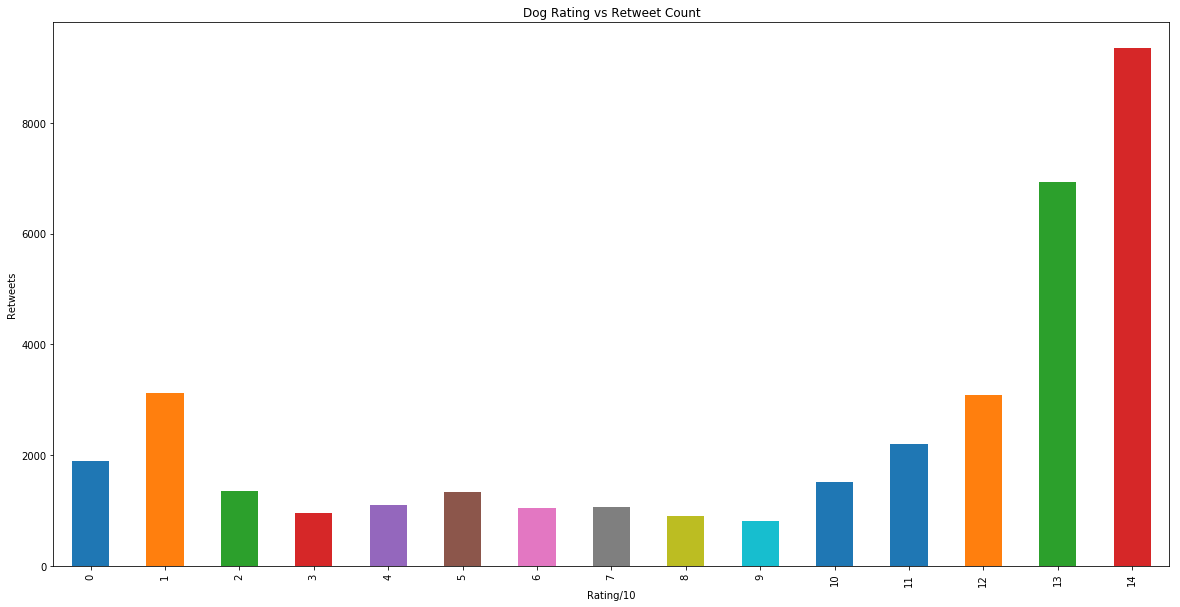

In [88]:
plt.figure(figsize=(20,10))

dogs_df.groupby(["rating_numerator"]).mean().retweet_count.plot(kind='bar')
plt.title("Dog Rating vs Retweet Count")
plt.ylabel('Retweets')
plt.xlabel("Rating/10");

### Insight #1 
#### From the previous observations.
#### On average, the higher the rating is out of 10, the higher the retweet count.

Lets try to look for other insight now.

In [89]:
dogs_df.groupby(["dog_stage"]).mean()

,rating_numerator,rating_denominator,prediction_confidence,prediction_isdog,retweet_count,favorite_count
dog_stage,,,,,,
,10.458583,10.0,0.590678,0.739496,2576.268908,8503.367947
doggo,11.888889,10.0,0.577058,0.761905,7125.698413,19356.380952
floofer,12.000000,10.0,0.609204,1.000000,4968.714286,13206.000000
pupper,10.633663,10.0,0.602998,0.707921,2365.950495,7197.133663
puppo,12.000000,10.0,0.722293,0.863636,6473.954545,21582.090909


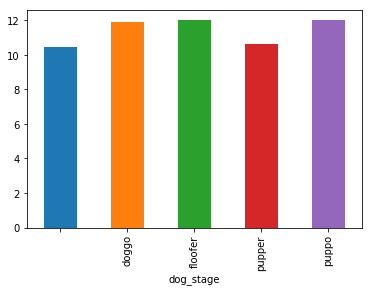

In [90]:
dogs_df.groupby(["dog_stage"]).mean().rating_numerator.plot(kind='bar')##Observing

In [91]:
dogs_df.groupby(["dog_stage"]).mean().retweet_count

dog_stage
           2576.268908
doggo      7125.698413
floofer    4968.714286
pupper     2365.950495
puppo      6473.954545
Name: retweet_count, dtype: float64

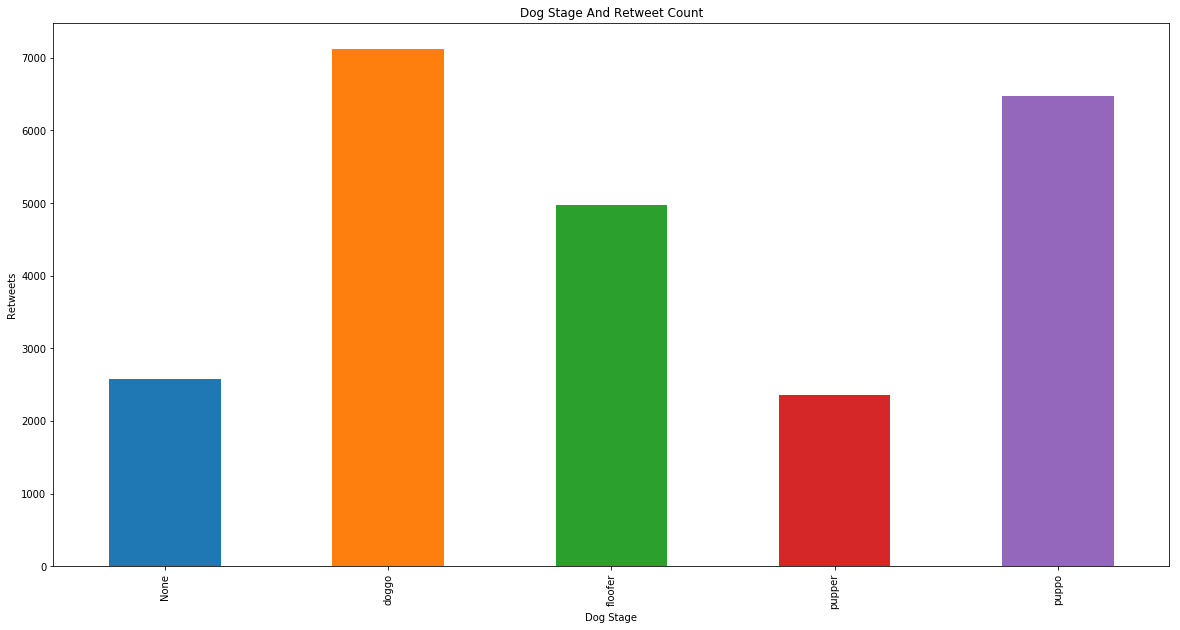

In [92]:
plt.figure(figsize=(20,10))

dogs_df.groupby(["dog_stage"]).mean().retweet_count.plot(kind='bar') 
plt.ylabel('Retweets')
plt.xlabel("Dog Stage"); ## TODO
plt.xticks(np.arange(5), ('None', 'doggo', 'floofer', 'pupper', 'puppo'))
plt.title("Dog Stage And Retweet Count");

### Insight #2

### Tweets with Dog Stage included have on aveage more retweets in general thantweets without a Dog Stage included except for the Dog Stage "pupper.

For my last insight I will create a filtered dataframe that will use the image prediction algorthim to compare between different dog breeds. I will use images that have >=50% confidecne prediction value.

The reason that I didn't do this in the cleaning is to leave the option for future analysts to choose the confidence value they see fit depending on their needs. 

In [93]:
dog_df_images50 = dogs_df[dogs_df["prediction_confidence"]>=0.5]

In [94]:
dog_df_images50.shape

(1165, 20)

In [95]:
dog_df_images50.prediction_isdog.sum() 
## 920 with prediction value >50% are prediction of dogs, I will filter the rest.

920

In [96]:
dog_df_images50 = dog_df_images50[dog_df_images50["prediction_isdog"]==True]

In [97]:
sum(dog_df_images50.prediction_isdog==False) 
## All rows are prediction of dogs now.

0

In the cell below I will extract the top 10 dogs breeds into a list by using value_counts to find the top 10 and index.tolist() to conver to list.

then I will select the rows that have one of the dog breeds in the top 10. 

With our cleaned data (Standarlizing the names to lowercase letters) there should not be an under counting of the dog breeds due to different case words with the same name at least (Limitation).

In [98]:
top10breeds = dog_df_images50.image_prediction.value_counts().head(10).index.tolist() ## Get top 10 dogs count-wise
dog_df_images50 = dog_df_images50[dog_df_images50.image_prediction.isin( top10breeds)] ## Extract the data for the top dogs only

In [99]:
dog_df_images50.shape ## top 10 dogs account for 464 rows of our clean data. 

(464, 20)

In [100]:
dog_df_images50.groupby(['image_prediction']).count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,prediction_confidence,prediction_isdog,retweet_count,favorite_count,dog_stage
image_prediction,,,,,,,,,,,,,,,,,,,
chihuahua,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
chow,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
french_bulldog,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
golden_retriever,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111
labrador_retriever,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
pembroke,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
pomeranian,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
pug,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
samoyed,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


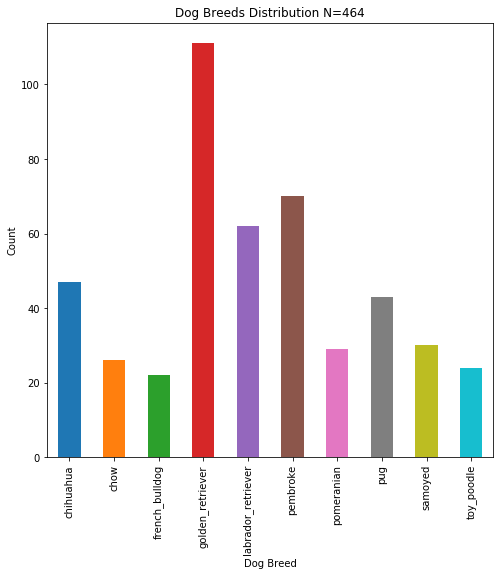

In [101]:
dog_df_images50.groupby(['image_prediction']).count().tweet_id.plot.bar(figsize=(8,8))
plt.title("Dog Breeds Distribution N=464")
plt.ylabel("Count");
plt.xlabel("Dog Breed");

### Insight #3

### The top 10 frequent dog breeds account for 464 of the rows. The golden_retriever account for most of the dog tweets, with  111 tweets. followed by the pembroke and the labrador_retriever with 70 and 62 tweets respectively out of the 464 tweets.

